In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import  LinearRegression, Lasso, Ridge,ElasticNet, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE


In [2]:
df = pd.read_csv('My_Data.csv')

In [3]:
df.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [4]:
df.tail()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare
4705,Technician,5%,825,3256,0.253378,Supply Chain & Logistics


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   object 
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 220.7+ KB


In [6]:
df.isnull().sum()

Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64

In [7]:
df.corr()

,Tasks,AI models,AI_Workload_Ratio
Tasks,1.000000,0.928350,0.631305
AI models,0.928350,1.000000,0.346893
AI_Workload_Ratio,0.631305,0.346893,1.000000


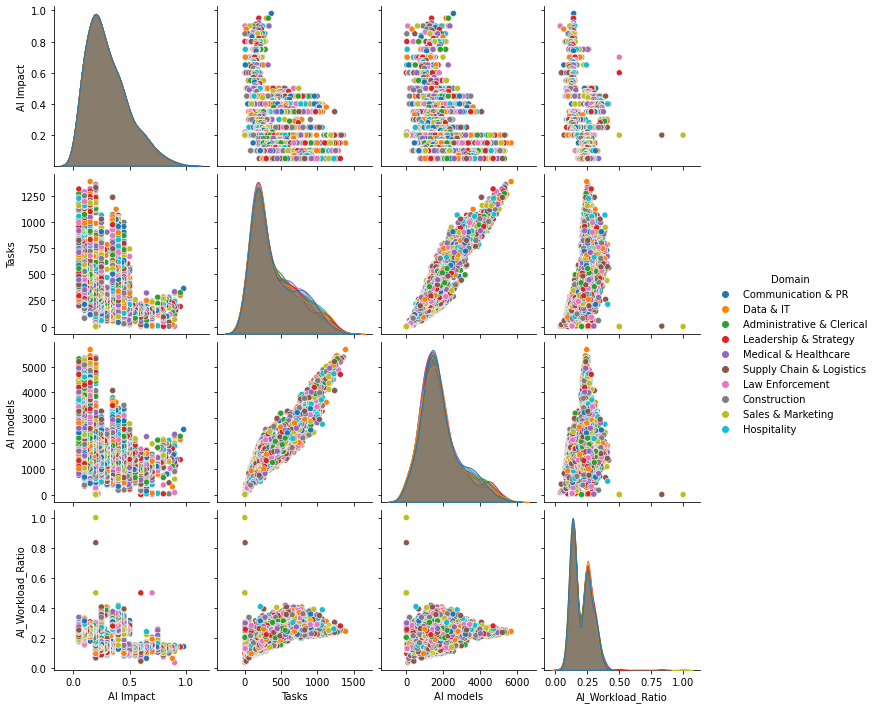

In [52]:
from seaborn import pairplot
pairplot(data=df, hue='Domain')

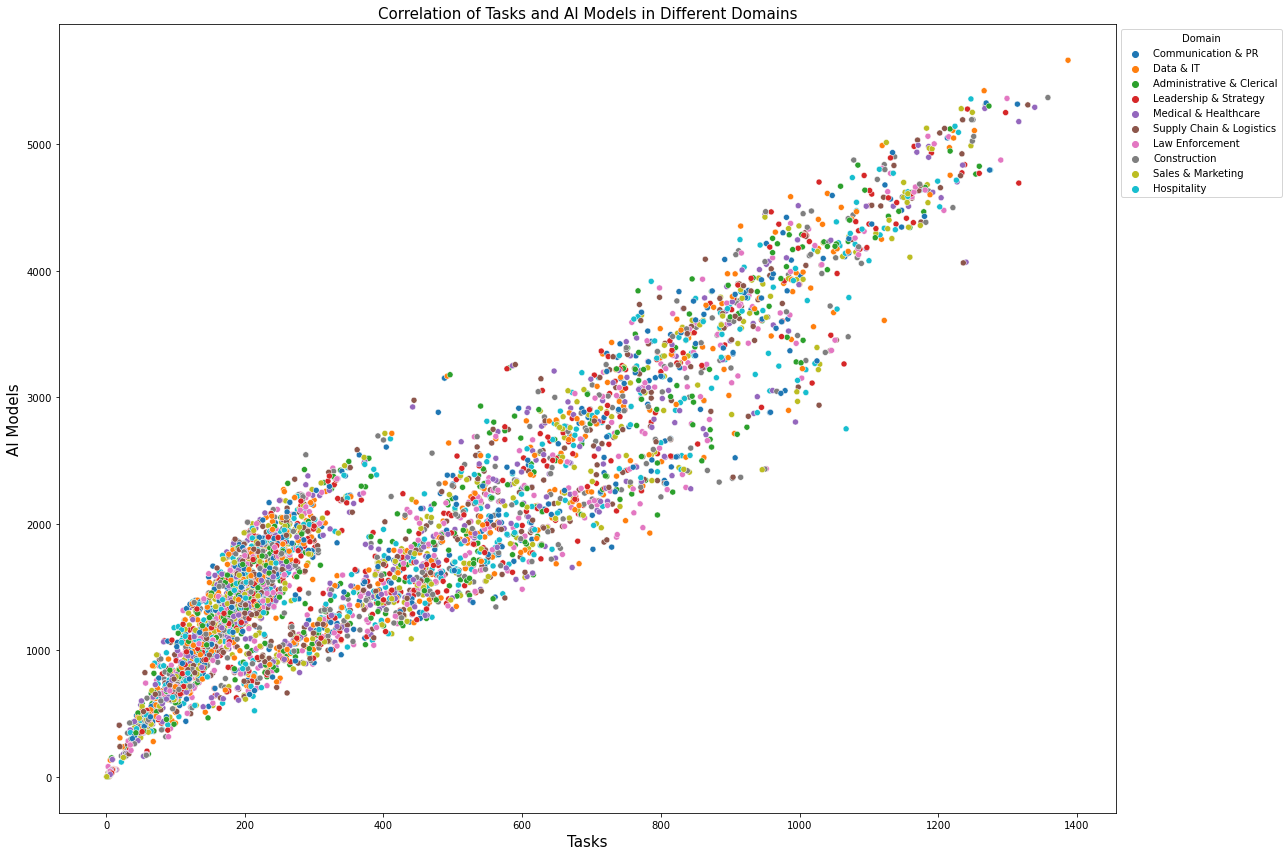

In [53]:
plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x='Tasks', y='AI models', hue='Domain')
plt.title('Correlation of Tasks and AI Models in Different Domains', fontsize=15)
plt.xlabel('Tasks', fontsize=15)
plt.ylabel('AI Models', fontsize=15)
plt.legend(title='Domain', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
management_roles = ['CEO', 'Director', 'Manager', 'Executive', 'Chief', 'President', 'Vice President', 'Head']

management_data = df[df['Job titiles'].str.contains('|'.join(management_roles), case=False, na=False)]

# Sorting based on AI_Workload_Ratio and AI Impact
management_sorted_workload = management_data.sort_values(by='AI_Workload_Ratio', ascending=False).head(10)
management_sorted_impact = management_data.sort_values(by='AI Impact', ascending=False).head(10)

management_sorted_workload[['Job titiles', 'AI_Workload_Ratio']], management_sorted_impact[['Job titiles', 'AI Impact']]

(                      Job titiles  AI_Workload_Ratio
 3358         Front Office Manager           0.500000
 2404              Sports Director           0.405797
 2270     Sales Operations Manager           0.390000
 2256  Process Improvement Manager           0.388186
 2571         Retail Sales Manager           0.385163
 2257           Recruiting Manager           0.382465
 2397             Shipping Manager           0.372822
 2259                Salon Manager           0.372130
 1166             Database Manager           0.364464
 2633    Regional Property Manager           0.363689,
                       Job titiles  AI Impact
 0          Communications Manager       0.98
 5   Chief Executive Officer (CEO)       0.91
 7          Chief Strategy Officer       0.90
 20            Development Manager       0.89
 22         Chief Security Officer       0.88
 25         Director Of Operations       0.87
 27   Chief Communications Officer       0.85
 29            Executive Assistant   

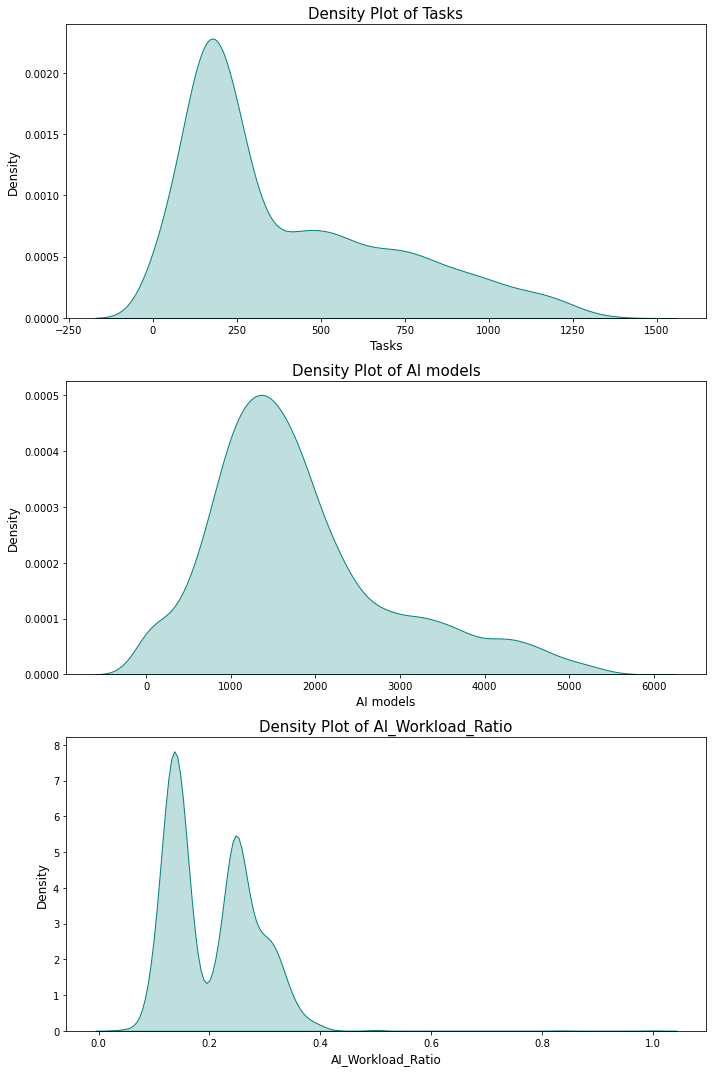

In [57]:
numerical_columns = ['Tasks', 'AI models', 'AI_Workload_Ratio']
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for ax, column in zip(axes, numerical_columns):
    sns.kdeplot(df[column], ax=ax, shade=True, color='teal')
    ax.set_title(f'Density Plot of {column}', fontsize=15)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
# Remove '%' sign and convert 'AI Impact' column to numeric
df['AI Impact'] = df['AI Impact'].str.rstrip('%').astype(float) / 100

# Display the unique values to verify if they're converted properly
print(df['AI Impact'].unique())


[0.98 0.95 0.92 0.91 0.9  0.89 0.88 0.87 0.86 0.85 0.84 0.83 0.82 0.8
 0.79 0.78 0.77 0.76 0.75 0.74 0.71 0.7  0.68 0.67 0.65 0.64 0.63 0.62
 0.61 0.6  0.59 0.58 0.57 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47
 0.46 0.45 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33
 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19
 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05]


In [23]:

column_name = "AI_Workload_Ratio"

if np.issubdtype(df[column_name].dtype, np.number):
    infinite_values = np.isinf(df[column_name]).sum()
    print(f"Number of infinite values in {column_name}: {infinite_values}")
else:
    print(f"{column_name} is not a numeric column.")


Number of infinite values in AI_Workload_Ratio: 0


In [24]:
df["AI_Workload_Ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [25]:
mean_value = df["AI_Workload_Ratio"].mean()

# Fill NaN values with the mean
df["AI_Workload_Ratio"].fillna(mean_value, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   float64
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 220.7+ KB


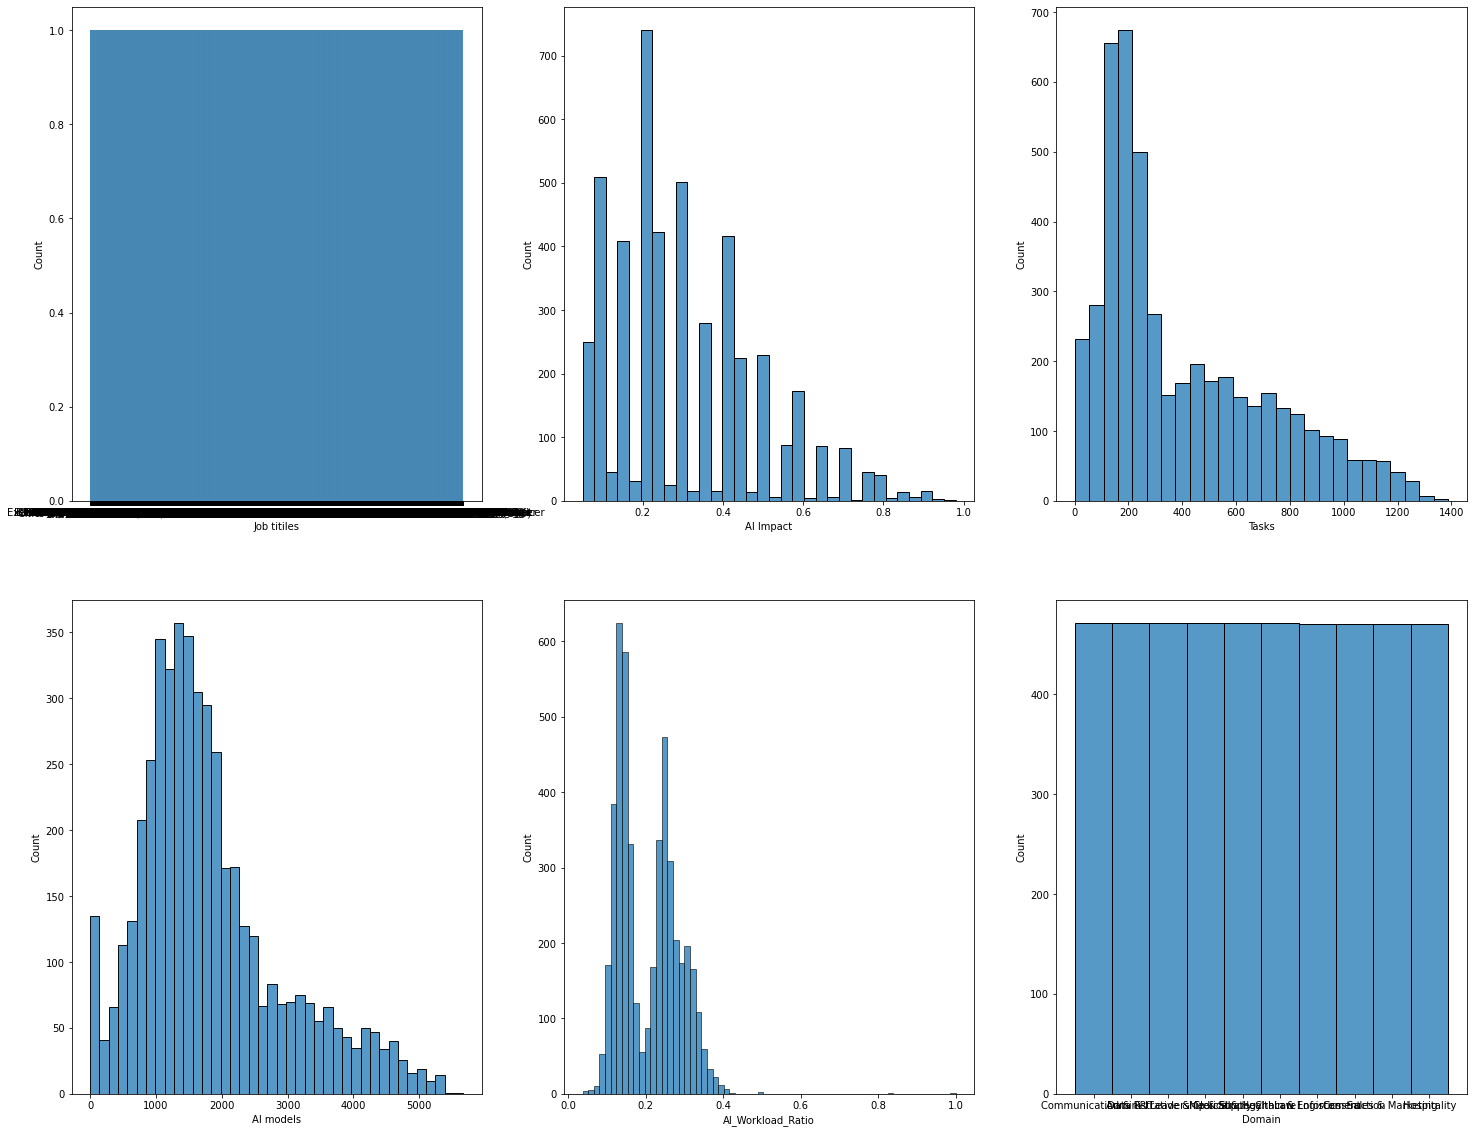

In [26]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//3][i%3])

<AxesSubplot:>

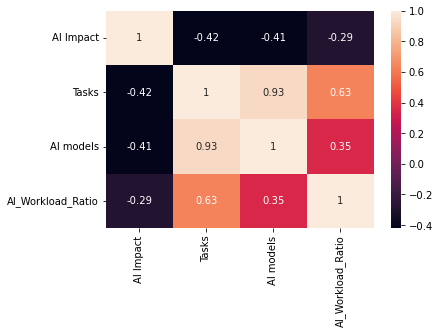

In [28]:
sns.heatmap(df.corr(),annot=True)

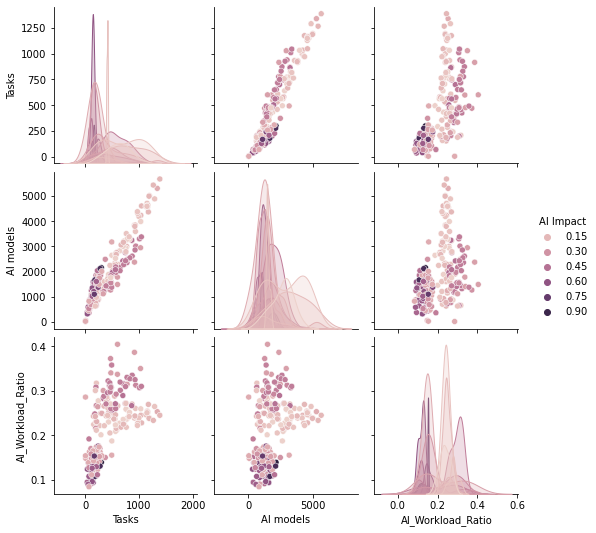

In [29]:
sns.pairplot(df.sample(frac=0.05), hue='AI Impact')

In [30]:
df_encoded = pd.get_dummies(df, columns=['Job titiles', 'Domain'], drop_first=True)

In [31]:
X = df_encoded.drop(["AI Impact"], axis=1)
y = df_encoded["AI Impact"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train, X_test, y_train, y_test)

      Tasks  AI models  AI_Workload_Ratio  Job titiles_3D Animator  \
3403    626       2714           0.230656                        0   
2011    159       1430           0.111189                        0   
3298     83        879           0.094425                        0   
426     121        812           0.149015                        0   
1427    700       2137           0.327562                        0   
...     ...        ...                ...                      ...   
4426   1194       5005           0.238561                        0   
466     149       1055           0.141232                        0   
3092    175       1596           0.109649                        0   
3772    772       2986           0.258540                        0   
860     546       1664           0.328125                        0   

      Job titiles_3D Artist  Job titiles_3D Designer  Job titiles_3D Modeler  \
3403                      0                        0                       0   

In [37]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
#SVR = SVR()


In [36]:
models = [LR,DTR,RFR,KNR,SVR,MLP]
d = {}
for model in models:
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(model,":",r2_score(y_test,ypred)*100)
    d.update({str(model):model.score(X_test,y_test)*100})

LinearRegression() : -9.93496757769714
DecisionTreeRegressor() : 16.79895427403293
RandomForestRegressor() : 42.58909965228218
KNeighborsRegressor() : 44.04368372435078
SVR() : 27.779829361895402
MLPRegressor() : -1.1810885990724662
